# Simple

## JJ

Generated objects are: Ib1 JJ1


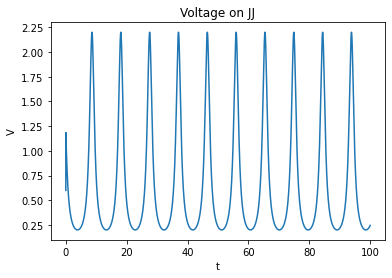

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import JJ,Pulses, Ib
from FunctionCompiler import *

pulse_1 = Ib.Ib(loc=[1, 0],val=1.2)
JJ_1 = JJ.JJ(loc=[1,0],c=1,r=1,A=1)

t = np.arange(0, 100, 0.01)
fc = FunctionCompiler([pulse_1, JJ_1], t)


sol = fc.solve()

V_JJ1 = JJ_1.get_data("V", t, sol);

fig, ax = plt.subplots()
plt.title('Voltage on JJ')
plt.xlabel('t')
plt.ylabel('V')

plt.plot(t, V_JJ1)


## L

Generated objects are: Pulses1 L1


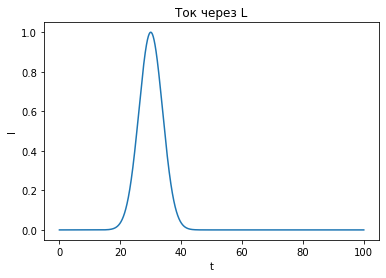

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import JJ,Pulses, Ib, L
from FunctionCompiler import *

pulse_1 = Pulses.Pulses(loc=[1],A=1, t0=30)
L_1 = L.L(loc=[1,0],val=1)

t = np.arange(0, 100, 0.01)
fc = FunctionCompiler([pulse_1, L_1], t)

sol = fc.solve()

V_L1 = L_1.get_data("I", t, sol);

fig, ax = plt.subplots()
plt.title('Ток через L')
plt.xlabel('t')
plt.ylabel('I')

plt.plot(t, V_L1)

# fig.savefig('pictures/L/current.png')

# Изменить знак у V

## C

Generated objects are: Pulses1 C1


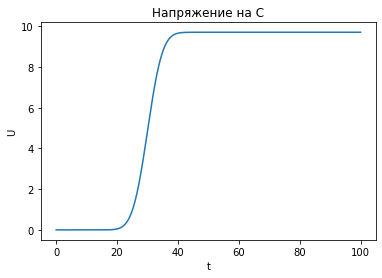

In [3]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import Pulses, Ib, C
from FunctionCompiler import *

pulse_1 = Pulses.Pulses(loc=[1],A=1, t0=30)
C_1 = C.C(loc=[1,0],c=1)

t = np.arange(0, 100, 0.01)
fc = FunctionCompiler([pulse_1, C_1], t)

sol = fc.solve()

V_C1 = C_1.get_data("V", t, sol);

fig, ax = plt.subplots()
plt.title('Напряжение на C')
plt.xlabel('t')
plt.ylabel('U')

plt.plot(t, V_C1)

# fig.savefig('pictures/C/voltage.png')

## R

Generated objects are: Square_pulse1 R1


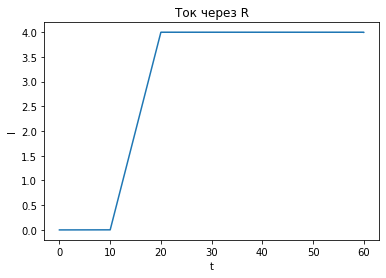

In [4]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import Pulses, Ib, R,Square_pulse
from FunctionCompiler import *

pulse_1 = Square_pulse.Square_pulse(loc=[1],A=0.4,length=10)
R_1 = R.R(loc=[1,0],r=2)

t = np.arange(0, 60, 0.01)
fc = FunctionCompiler([pulse_1, R_1], t)


sol = fc.solve()

V_R1 = R_1.get_data("P", t, sol);

fig, ax = plt.subplots()
plt.title('Ток через R')
plt.xlabel('t')
plt.ylabel('I')

plt.plot(t, V_R1)

#fig.savefig('pictures/R/current.png')

# Pulse Merger

In [11]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import Pulse_Merger, JJ, Pulses, JTL
from FunctionCompiler import *

In [12]:
A = Pulses.Pulses(loc=[1], A = 1.5, t0 = 35)
B = Pulses.Pulses(loc=[3], A = 1.5, t0 = 30)

merger = Pulse_Merger.Pulse_Merger(loc=[2,4,5])

jtl_1 = JTL.JTL(loc=[1,2], N = 5, jj_c = 1, jj_r = 1)
jtl_2 = JTL.JTL(loc=[3,4], N = 5, jj_c = 1, jj_r = 1)

jtl_3 = JTL.JTL(loc=[5,6], N = 5, jj_c = 1, jj_r = 1)

In [13]:
t = np.arange(0, 80, 0.01)
fc = FunctionCompiler([A, B, jtl_1, jtl_2, jtl_3,merger],t)

sol = fc.solve()

Generated objects are: Pulses1 Pulses2 JTL1_JJ1 JTL1_Ib1 JTL1_L1 JTL1_JJ2 JTL1_Ib2 JTL1_L2 JTL1_JJ3 JTL1_Ib3 JTL1_L3 JTL1_JJ4 JTL1_Ib4 JTL1_L4 JTL1_JJ5 JTL1_Ib5 JTL2_JJ1 JTL2_Ib1 JTL2_L1 JTL2_JJ2 JTL2_Ib2 JTL2_L2 JTL2_JJ3 JTL2_Ib3 JTL2_L3 JTL2_JJ4 JTL2_Ib4 JTL2_L4 JTL2_JJ5 JTL2_Ib5 JTL3_JJ1 JTL3_Ib1 JTL3_L1 JTL3_JJ2 JTL3_Ib2 JTL3_L2 JTL3_JJ3 JTL3_Ib3 JTL3_L3 JTL3_JJ4 JTL3_Ib4 JTL3_L4 JTL3_JJ5 JTL3_Ib5 Pulse_Merger1_J3 Pulse_Merger1_J2 Pulse_Merger1_J4 Pulse_Merger1_J1 Pulse_Merger1_J5 Pulse_Merger1_Ib1 Pulse_Merger1_L1 Pulse_Merger1_L2 Pulse_Merger1_Lp3 Pulse_Merger1_Lp2 Pulse_Merger1_Lp4 Pulse_Merger1_Lp1 Pulse_Merger1_L5 Pulse_Merger1_L11 Pulse_Merger1_L4 Pulse_Merger1_Lp5 Pulse_Merger1_L3


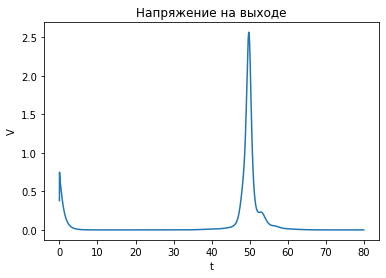

In [14]:
J_3 = fc.object_dict['JTL3_JJ1']
V_J_3 = J_3.get_data("V", t, sol);
#V_L_A = L_A.get_data("V", t, sol);

fig, ax = plt.subplots()
plt.title('Напряжение на выходе')
plt.xlabel('t')
plt.ylabel('V')
plt.plot(t,V_J_3)
#fig.savefig('pictures/Pulse Merger/Sync/output.png')

# Splitter

In [31]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import Splitter, JJ, Pulses, JTL
from FunctionCompiler import *

In [32]:
A = Pulses.Pulses(loc=[1], A = 1.5, t0 = 40)

splitt = Splitter.Splitter(loc=[2,3,4])

jtl_1 = JTL.JTL(loc=[1,2], N = 4, jj_c = 1, jj_r = 1)

In [33]:
t = np.arange(0, 150, 0.01)
fc = FunctionCompiler([A, splitt,jtl_1],t)

sol = fc.solve()

Generated objects are: Pulses1 Splitter1_ibJin Splitter1_ibJout1 Splitter1_ibJout2 Splitter1_Jin Splitter1_Jout1 Splitter1_Jout2 Splitter1_Lin Splitter1_Lout1 Splitter1_Lout2 JTL1_JJ1 JTL1_Ib1 JTL1_L1 JTL1_JJ2 JTL1_Ib2 JTL1_L2 JTL1_JJ3 JTL1_Ib3 JTL1_L3 JTL1_JJ4 JTL1_Ib4


In [36]:
JJ_in = fc.object_dict['JTL1_JJ1']
JJ_out_1 = fc.object_dict['Splitter1_Jout1']
JJ_out_2 = fc.object_dict['Splitter1_Jout2']

V_in = JJ_in.get_data("V",t,sol);
V_out_1 = JJ_out_1.get_data("V",t,sol);
V_out_2 = JJ_out_2.get_data("V",t,sol);

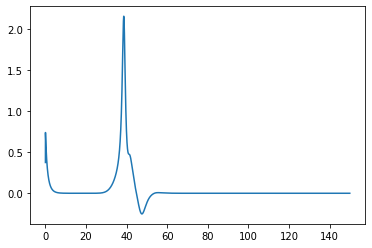

In [37]:
plt.plot(t,V_in)

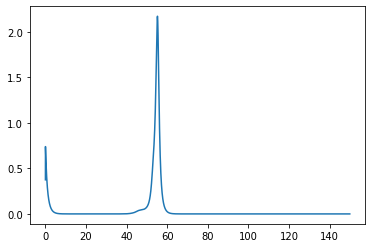

In [38]:
plt.plot(t,V_out_1)

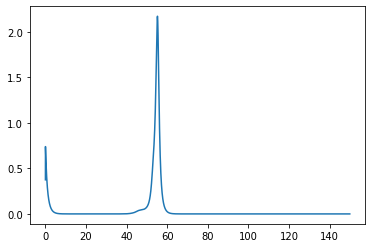

In [39]:
plt.plot(t,V_out_2)

## Phase test

In [45]:
JJ_in = fc.object_dict['JTL1_JJ1']
L_out_2 = fc.object_dict['Splitter1_Lout1']
JJ_out_2 = fc.object_dict['Splitter1_Jout1']

P_JJ_in = JJ_in.get_data("P",t,sol);
P_L_out_2 = L_out_2.get_data("P",t,sol);
P_JJ_out_2 = JJ_out_2.get_data("P",t,sol);

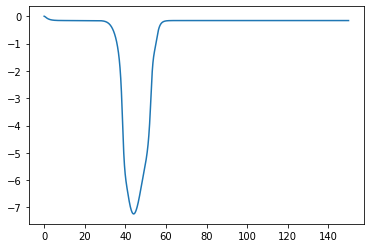

In [46]:
plt.plot(t,-P_JJ_in + P_L_out_2+P_JJ_out_2)

# NDRO (Likharev article)

In [16]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import NDRO, L, JJ, Pulses
from FunctionCompiler import *

In [17]:
T = Pulses.Pulses(loc=[1], A = 2, t0 = 20)
A = Pulses.Pulses(loc=[2], A = 2, t0 = 10)
B = Pulses.Pulses(loc=[3], A = 2, t0 = 15)

ndro = NDRO.NDRO(loc=[1,2,3,4,5])

JJ1 = JJ.JJ(loc=[4,0], A = 2, c=1, r=1)
JJ2 = JJ.JJ(loc=[5,0], A = 2, c=1, r=1)

Generated objects are: Pulses1 Pulses2 Pulses3 JJ1 JJ2 NDRO1_Ib1 NDRO1_Ib2 NDRO1_Ib3 NDRO1_J1 NDRO1_J2 NDRO1_J3 NDRO1_J4 NDRO1_J5 NDRO1_J6 NDRO1_J7 NDRO1_L1 NDRO1_L2 NDRO1_L3 NDRO1_L4 NDRO1_L5 NDRO1_L6 NDRO1_L7


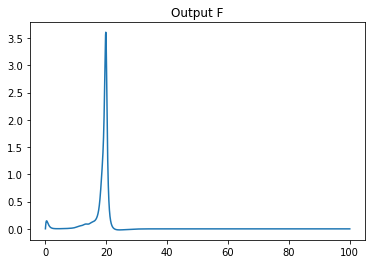

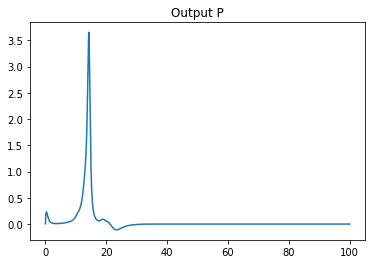

In [18]:
t = np.arange(0, 100, 0.01)
fc = FunctionCompiler([T, A, B, ndro, JJ1, JJ2], t)


sol = fc.solve()

V_JJ1 = JJ1.get_data("V", t, sol);
V_JJ2 = JJ2.get_data("V", t, sol);

fig,ax = plt.subplots()
plt.title('Output F')
ax.plot(t, V_JJ1)


fig,ax = plt.subplots()
plt.title('Output P')
ax.plot(t, V_JJ2)

# XOR

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import Pulses, XOR, JJ
from FunctionCompiler import *

P1 = Pulses.Pulses(loc=[1], A = 1.75, t0 = 42)

T1 =  Pulses.Pulses(loc=[3], A = 1, t0 = 45)

P3 = Pulses.Pulses(loc=[1], A = 1.75, t0 = 142)
P4 = Pulses.Pulses(loc=[2], A = 1.75, t0 = 146)
T2 =  Pulses.Pulses(loc=[3], A = 1.5, t0 = 147)


xor = XOR.XOR(loc=[1,2,3,4])


In [3]:
t = np.arange(0, 200, 0.01)
fc = FunctionCompiler([P1,T1, P3, P4,T2, xor], t)

sol = fc.solve()

JJ_5 = fc.object_dict['XOR1_J5']
V_JJ_5 = JJ_5.get_data("V",t,sol);

L_1 = fc.object_dict['XOR1_L1']
P_L_1 = L_1.get_data("V",t,sol);

JJ_6 = fc.object_dict['XOR1_J6']
V_JJ_6 = JJ_6.get_data("V",t,sol);

Generated objects are: Pulses1 Pulses2 Pulses3 Pulses4 Pulses5 XOR1_Ib1 XOR1_Ib2 XOR1_J1 XOR1_J2 XOR1_J3 XOR1_J4 XOR1_J5 XOR1_J6 XOR1_J7 XOR1_L1 XOR1_L2 XOR1_L3 XOR1_L4 XOR1_L5 XOR1_T


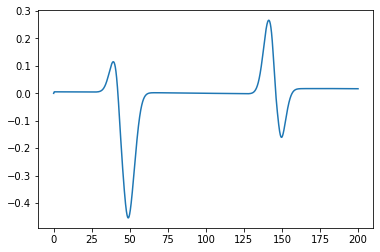

In [4]:
plt.plot(t,V_JJ_5)

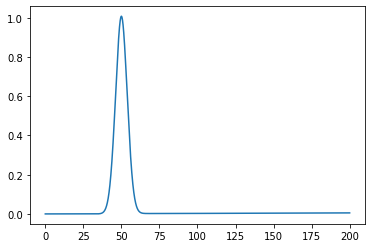

In [5]:
plt.plot(t,V_JJ_6)

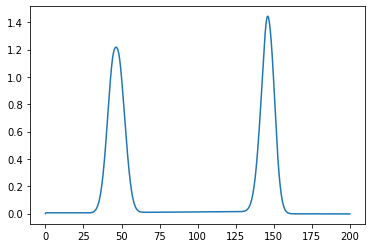

In [6]:
JJ_out = fc.object_dict['XOR1_J7']
V_JJ_out = JJ_out.get_data("V",t,sol);

plt.plot(t,V_JJ_out)

# C element

In [6]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import Pulses, C_element, JJ
from FunctionCompiler import *

P1 = Pulses.Pulses(loc=[1], t0 = 21, A = 3)
P2 = Pulses.Pulses(loc=[2], A = 3, t0 = 30)
elem = C_element.C_element(loc=[1,2,3])

JJ1 = JJ.JJ(loc=[3,0], A = 2, c=1, r=1)

Generated objects are: Pulses1 Pulses2 JJ1 C_element1_Ib1 C_element1_Ib2 C_element1_J1 C_element1_J2 C_element1_J3 C_element1_L1 C_element1_L2 C_element1_L3


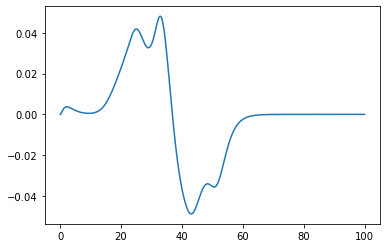

In [8]:
t = np.arange(0, 100, 0.01)
fc = FunctionCompiler([P1, P2, elem, JJ1], t)

sol = fc.solve()

V_JJ1 = JJ1.get_data("V", t, sol);

plt.plot(t, V_JJ1)

# Async AND

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import Async_AND, JJ, Pulses, L, JTL
from FunctionCompiler import *

A_1 = Pulses.Pulses(loc=[1], t0 = 80, A = 1)
A_2 = Pulses.Pulses(loc=[1], t0 = 150, A = 1)
B = Pulses.Pulses(loc=[2], t0 = 155, A = 1)
#ib = Ib.Ib(loc=[1],  val = 3)
AND = Async_AND.Async_AND(loc=[1,2,3])

t = np.arange(0, 300, 0.5)
fc = FunctionCompiler([A_1, A_2, B, AND],t)

sol = fc.solve()

Generated objects are: Pulses1 Pulses2 Pulses3 Async_AND1_Ib1 Async_AND1_J1 Async_AND1_J2 Async_AND1_J3 Async_AND1_JD1 Async_AND1_JD2 Async_AND1_L1 Async_AND1_L2 Async_AND1_RD1 Async_AND1_RD2


In [2]:
fc.object_dict

{'Pulses1': <Objects.Pulses.Pulses at 0x21b69d91b20>,
 'Pulses2': <Objects.Pulses.Pulses at 0x21b69f4b5e0>,
 'Pulses3': <Objects.Pulses.Pulses at 0x21b5b6883a0>,
 'Async_AND1_Ib1': <Objects.Ib.Ib at 0x21b7a173d30>,
 'Async_AND1_J1': <Objects.JJ.JJ at 0x21b7a173d90>,
 'Async_AND1_J2': <Objects.JJ.JJ at 0x21b7a173d60>,
 'Async_AND1_J3': <Objects.JJ.JJ at 0x21b7a173e50>,
 'Async_AND1_JD1': <Objects.JJ.JJ at 0x21b7a173fa0>,
 'Async_AND1_JD2': <Objects.JJ.JJ at 0x21b7a173fd0>,
 'Async_AND1_L1': <Objects.L.L at 0x21b7a18e040>,
 'Async_AND1_L2': <Objects.L.L at 0x21b7a18e070>,
 'Async_AND1_RD1': <Objects.R.R at 0x21b7a18e0a0>,
 'Async_AND1_RD2': <Objects.R.R at 0x21b7a18e0d0>}

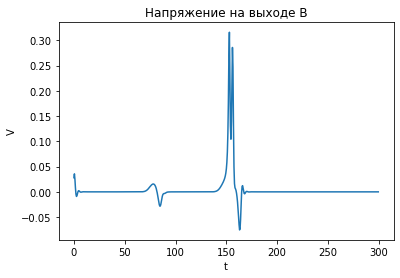

In [3]:
# Напряжение на выходном JJ

J_3 = fc.object_dict['Async_AND1_J3']
V_J_3 = J_3.get_data("V", t, sol);
#V_L_A = L_A.get_data("V", t, sol);

fig, ax = plt.subplots()
plt.title('Напряжение на выходе B')
plt.xlabel('t')
plt.ylabel('V')
plt.plot(t,V_J_3)
#fig.savefig('pictures/Async_AND/Async/output.png')

# Async OR

In [25]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import Async_OR, JJ, Pulses, L
from FunctionCompiler import *

A_1 = Pulses.Pulses(loc=[1], t0 = 50, A = 4)
A_2 = Pulses.Pulses(loc=[1], t0 = 100, A = 3)
B = Pulses.Pulses(loc=[2], t0 = 105, A = 3)

#B_2 = Pulses.Pulses(loc=[2], t0 = 165, A = 4)
OR = Async_OR.Async_OR(loc=[1,2,3])


t = np.arange(0, 250, 0.1)
fc = FunctionCompiler([A_1, A_2, B, OR], t)

sol = fc.solve()

Generated objects are: Pulses1 Pulses2 Pulses3 Async_OR1_J_IA Async_OR1_J_IB Async_OR1_J_UA Async_OR1_J_UB Async_OR1_J_LA Async_OR1_J_LB Async_OR1_J_LIM Async_OR1_J_P Async_OR1_J_PS Async_OR1_L_Bias Async_OR1_L_Poff Async_OR1_R_S
Async_OR1_J_IA 1 1 0.1
Async_OR1_J_IB 1 1 0.1
Async_OR1_J_UA 1 1 0.1
Async_OR1_J_UB 1 1 0.1
Async_OR1_J_LIM 1 1 0.1
Pulses1 [1, 0]
Pulses2 [1, 0]
Pulses3 [2, 0]
Async_OR1_J_IA [1, 4]
Async_OR1_J_IB [2, 5]
Async_OR1_J_UA [4, 3]
Async_OR1_J_UB [5, 3]
Async_OR1_J_LA [4, 0]
Async_OR1_J_LB [5, 0]
Async_OR1_J_LIM [3, 8]
Async_OR1_J_P [6, 0]
Async_OR1_J_PS [7, 0]
Async_OR1_L_Bias [8, 0]
Async_OR1_L_Poff [3, 6]
Async_OR1_R_S [6, 7]


In [26]:
fc.object_dict

{'Pulses1': <Objects.Pulses.Pulses at 0x1975109d3d0>,
 'Pulses2': <Objects.Pulses.Pulses at 0x1975109d370>,
 'Pulses3': <Objects.Pulses.Pulses at 0x1975109dfa0>,
 'Async_OR1_J_IA': <Objects.JJ.JJ at 0x1975109d3a0>,
 'Async_OR1_J_IB': <Objects.JJ.JJ at 0x1975109de80>,
 'Async_OR1_J_UA': <Objects.JJ.JJ at 0x1975109de50>,
 'Async_OR1_J_UB': <Objects.JJ.JJ at 0x19751095a00>,
 'Async_OR1_J_LA': <Objects.JJ.JJ at 0x197510959d0>,
 'Async_OR1_J_LB': <Objects.JJ.JJ at 0x197510959a0>,
 'Async_OR1_J_LIM': <Objects.JJ.JJ at 0x19751095970>,
 'Async_OR1_J_P': <Objects.JJ.JJ at 0x19751095940>,
 'Async_OR1_J_PS': <Objects.JJ.JJ at 0x19751095400>,
 'Async_OR1_L_Bias': <Objects.L.L at 0x197510953d0>,
 'Async_OR1_L_Poff': <Objects.L.L at 0x197510951c0>,
 'Async_OR1_R_S': <Objects.R.R at 0x197510954f0>}

In [27]:
'''J_LA = fc.object_dict['Async_OR1_J_P']
plt.plot(t,J_LA.get_data("V",t,sol))'''

'J_LA = fc.object_dict[\'Async_OR1_J_P\']\nplt.plot(t,J_LA.get_data("V",t,sol))'

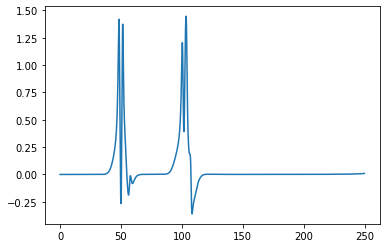

In [28]:
L_out = fc.object_dict['Async_OR1_L_Bias']
V_L_out = L_out.get_data("V",t,sol);

JJ_out = fc.object_dict['Async_OR1_J_LIM']
V_JJ_out = JJ_out.get_data("V", t, sol);

V_out = V_L_out+V_JJ_out
plt.plot(t,V_out)

# AND

In [7]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import Pulses, AND, JJ, R
from FunctionCompiler import *

#In1
pulse_in = Pulses.Pulses(loc=[1], A=2, t0 = 20)
pulse_1 = Pulses.Pulses(loc=[1], A=2, t0 = 70)

#add_JJ = R.R(loc=[5,2], R=1)

#CLK
pulse_2 = Pulses.Pulses(loc=[2], A=1, t0 = 15)
pulse_3 = Pulses.Pulses(loc=[2], A=1, t0 = 50)
pulse = Pulses.Pulses(loc=[2], A=1, t0 = 90)

#In2
pulse_4 = Pulses.Pulses(loc=[3], A=2, t0 = 30)
pulse_clk = Pulses.Pulses(loc=[3], A=2, t0 = 80) 

gate_and = AND.AND(loc=[1,2,3,4])

t = np.arange(0, 150, 0.01)
fc = FunctionCompiler([pulse_in, pulse, pulse_1,pulse_2,pulse_3,pulse_4,  pulse_clk, gate_and],t)

sol = fc.solve()
fc.object_dict

Generated objects are: Pulses1 Pulses2 Pulses3 Pulses4 Pulses5 Pulses6 Pulses7 AND1_Ib1 AND1_Ib2 AND1_Ib3 AND1_J1 AND1_J2 AND1_J3 AND1_J4 AND1_J5 AND1_J6 AND1_J7 AND1_J8 AND1_J9 AND1_J10 AND1_J11 AND1_L1 AND1_L2 AND1_L3 AND1_L4 AND1_L5 AND1_L6


{'Pulses1': <Objects.Pulses.Pulses at 0x1ad8de35fd0>,
 'Pulses2': <Objects.Pulses.Pulses at 0x1adb10b9040>,
 'Pulses3': <Objects.Pulses.Pulses at 0x1adb103d5b0>,
 'Pulses4': <Objects.Pulses.Pulses at 0x1ad8de86e80>,
 'Pulses5': <Objects.Pulses.Pulses at 0x1ad8de130a0>,
 'Pulses6': <Objects.Pulses.Pulses at 0x1adb1022340>,
 'Pulses7': <Objects.Pulses.Pulses at 0x1adb10b9f70>,
 'AND1_Ib1': <Objects.Ib.Ib at 0x1adb10b9fa0>,
 'AND1_Ib2': <Objects.Ib.Ib at 0x1adb10b9f10>,
 'AND1_Ib3': <Objects.Ib.Ib at 0x1adb10b9ee0>,
 'AND1_J1': <Objects.JJ.JJ at 0x1adb10b9e80>,
 'AND1_J2': <Objects.JJ.JJ at 0x1adb10b9e50>,
 'AND1_J3': <Objects.JJ.JJ at 0x1adb10b9e20>,
 'AND1_J4': <Objects.JJ.JJ at 0x1adb10b9df0>,
 'AND1_J5': <Objects.JJ.JJ at 0x1adb10b9dc0>,
 'AND1_J6': <Objects.JJ.JJ at 0x1adb10b9d90>,
 'AND1_J7': <Objects.JJ.JJ at 0x1adb10b9d60>,
 'AND1_J8': <Objects.JJ.JJ at 0x1adb10b9d30>,
 'AND1_J9': <Objects.JJ.JJ at 0x1adb10b9d00>,
 'AND1_J10': <Objects.JJ.JJ at 0x1adb10b9cd0>,
 'AND1_J11': <Object

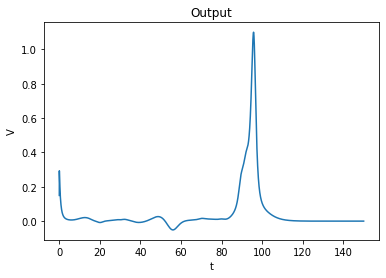

In [10]:
JJ_output = fc.object_dict['AND1_J11']

V_JJ_output = JJ_output.get_data("V", t, sol);

fig, ax = plt.subplots()
plt.title('Output')
plt.xlabel('t')
plt.ylabel('V')
#plt.ylim([0,2])
plt.plot(t,V_JJ_output)

#fig.savefig('pictures/AND/output.png')

# DC -> SFQ

In [5]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import DC_SFQ, JJ, Pulses, L, R, Sine_current,Square_pulse,Sine_current
from FunctionCompiler import *

Generated objects are: R1 Square_pulse1 Square_pulse2 JJ1 DC_SFQ1_Ib1 DC_SFQ1_J1 DC_SFQ1_J2 DC_SFQ1_J3 DC_SFQ1_J4 DC_SFQ1_L2 DC_SFQ1_L8 DC_SFQ1_L4 DC_SFQ1_Lp3 DC_SFQ1_L5 DC_SFQ1_Lp2 DC_SFQ1_L10 DC_SFQ1_L6 DC_SFQ1_Lp11 DC_SFQ1_L13 DC_SFQ1_Lp4 DC_SFQ1_L15


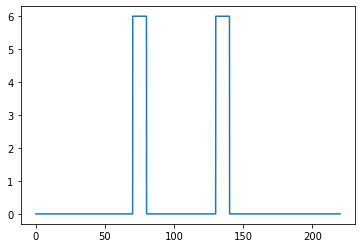

In [27]:
T_1 = Sine_current.Sine_current(loc=[1], A =3,length=100,w=1, t0 = 40)

T_2 = Square_pulse.Square_pulse(loc=[1], A =3,length=10, t0 = 70)
T_3 = Square_pulse.Square_pulse(loc=[1], A =3,length=10, t0 = 100)
T_4 = Square_pulse.Square_pulse(loc=[1], A =3,length=10, t0 = 130)
T_5 = Square_pulse.Square_pulse(loc=[1], A =3,length=10, t0 = 160)
#A = Pulses.Pulses(loc=[1], A =1, t0 = 60)
'''B = Pulses.Pulses(loc=[1], A =1, t0 = 60, D=1)
C = Pulses.Pulses(loc=[1], A =1, t0 = 80, D=1)'''
R1 = R.R(loc=[1,2], r=2)
dc_sfq = DC_SFQ.DC_SFQ(loc=[2,3])

J1 = JJ.JJ(loc=[3,0], A=2, r=1, c=1)

t = np.arange(0, 220, 0.01)
fc = FunctionCompiler([R1, T_2,T_4,  dc_sfq, J1], t)

sol = fc.solve()

V_J_1 = J1.get_data("V", t, sol);
V_R = R1.get_data("V", t,sol)

plt.plot(t, V_R)

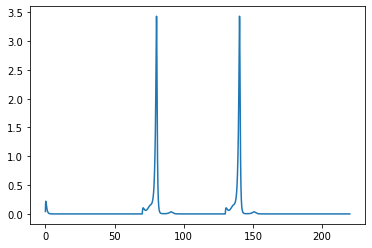

In [28]:
plt.plot(t, V_J_1)

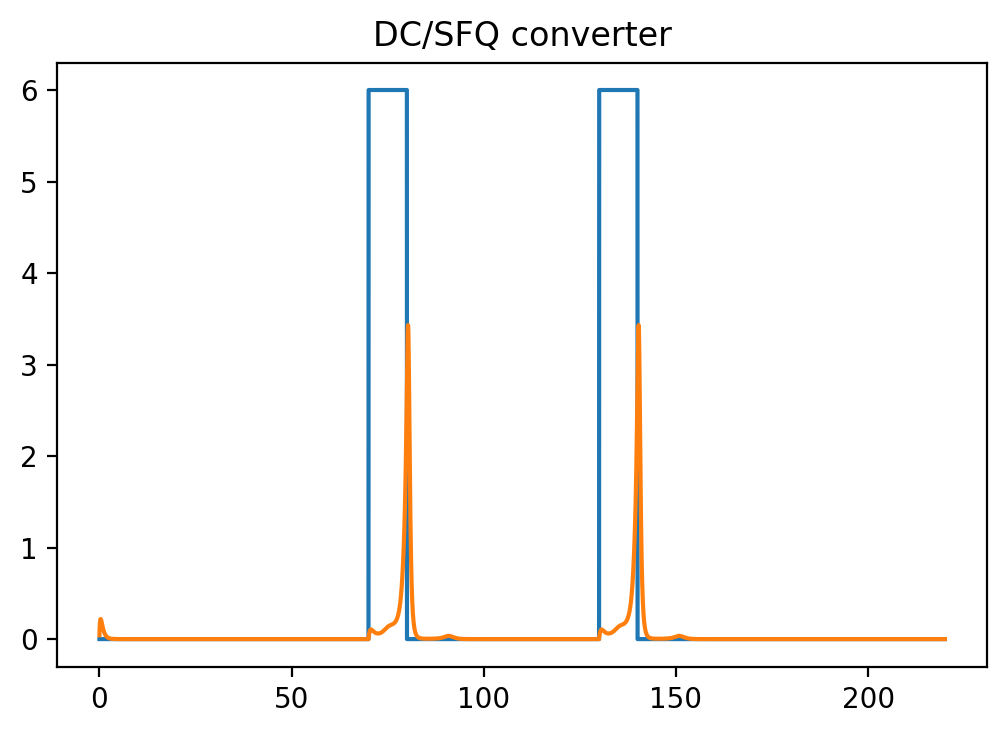

In [30]:
fig, ax = plt.subplots(dpi=200)

plt.title('DC/SFQ converter')
ax.plot(t,V_R)
ax.plot(t,V_J_1)

# SFQ/DC

## 1)

In [10]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import SFQ_DC, JJ, Pulses, L, R
from FunctionCompiler import *

In [11]:
T_1 = Pulses.Pulses(loc=[1], A = 1.3, t0 = 70)
T_2 = Pulses.Pulses(loc=[1], A = 1.3, t0 = 170)

T_3 = Pulses.Pulses(loc=[1], A = 1.3, t0 = 250)
T_4 = Pulses.Pulses(loc=[1], A = 1.3, t0 = 350)


conv = SFQ_DC.SFQ_DC(loc=[1,2,3])

R1 = R.R(loc=[2,0], r=0.3)
R2 = R.R(loc=[3,0],r=2.7)

t = np.arange(0, 500, 0.01)

fc = FunctionCompiler([T_1,T_2, T_3, T_4, conv, R1, R2],t)
sol = fc.solve()

Generated objects are: Pulses1 Pulses2 Pulses3 Pulses4 R1 R2 SFQ_DC1_J0 SFQ_DC1_J1 SFQ_DC1_J2 SFQ_DC1_J3 SFQ_DC1_J4 SFQ_DC1_J5 SFQ_DC1_J6 SFQ_DC1_J7 SFQ_DC1_J8 SFQ_DC1_J9 SFQ_DC1_L0 SFQ_DC1_L1 SFQ_DC1_L2 SFQ_DC1_L3 SFQ_DC1_L4 SFQ_DC1_L5 SFQ_DC1_L6 SFQ_DC1_L7 SFQ_DC1_L8 SFQ_DC1_L9 SFQ_DC1_L10 SFQ_DC1_L11 SFQ_DC1_L12 SFQ_DC1_L13 SFQ_DC1_L14 SFQ_DC1_L15 SFQ_DC1_L16 SFQ_DC1_L17 SFQ_DC1_L18 SFQ_DC1_L19 SFQ_DC1_L20 SFQ_DC1_L21 SFQ_DC1_L22 SFQ_DC1_L23 SFQ_DC1_L24 SFQ_DC1_L25 SFQ_DC1_Ib1 SFQ_DC1_Ib2 SFQ_DC1_Ib3 SFQ_DC1_Ib4


In [12]:
J0 = fc.object_dict['SFQ_DC1_J0']
L1 = fc.object_dict['SFQ_DC1_L1']
L23 = fc.object_dict['SFQ_DC1_L23']
L25 = fc.object_dict['SFQ_DC1_L25']

J7 = fc.object_dict['SFQ_DC1_J7']
J8 = fc.object_dict['SFQ_DC1_J8']


V_J0 = J0.get_data("V",t,sol);
V_L1 = L1.get_data("V",t,sol);
V_L23 = L23.get_data("V",t,sol);
V_L25 = L25.get_data("V",t,sol);

V_J7 = J7.get_data("V",t,sol);
V_J8 = J8.get_data("V",t,sol);

V_R1 = R1.get_data("V",t,sol);
V_R2 = R2.get_data("V",t,sol);

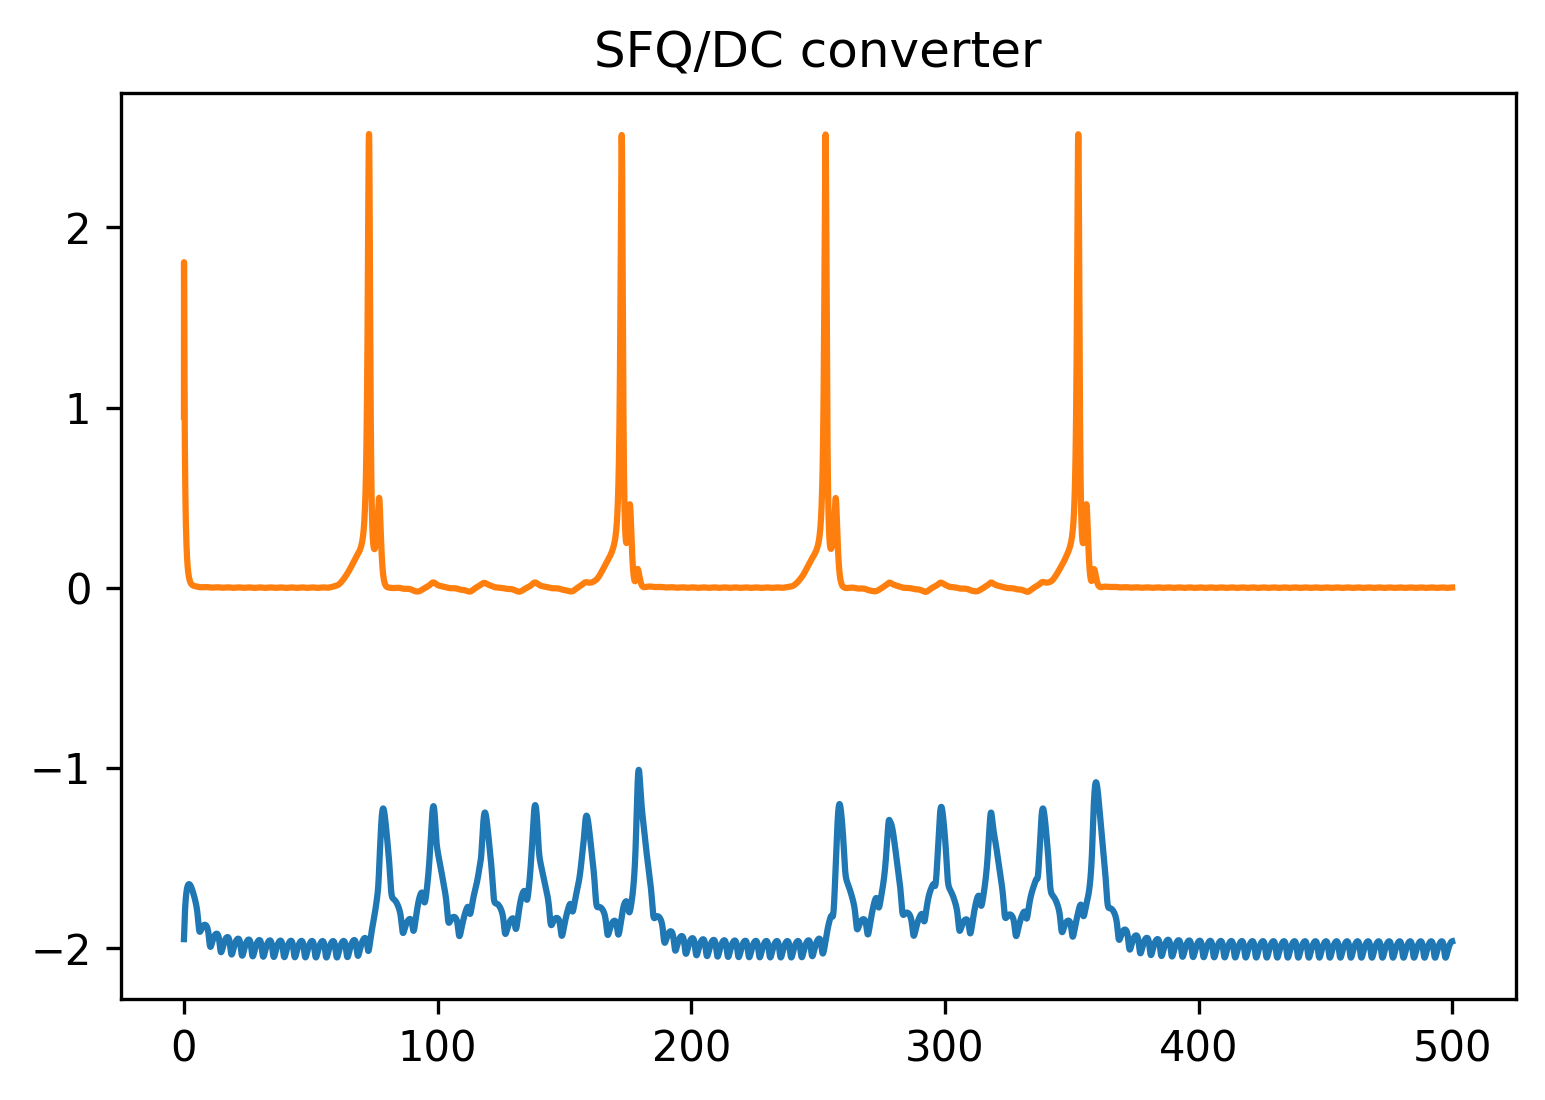

In [13]:
fig, ax = plt.subplots(dpi=300)

plt.title('SFQ/DC converter')
ax.plot(t,V_R1-2)
ax.plot(t,V_J0)

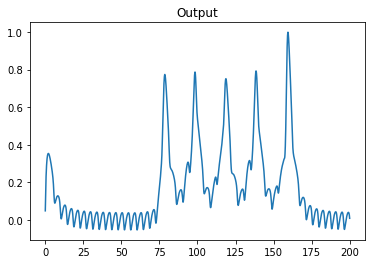

In [5]:
plt.title('Output')

plt.plot(t,V_R1)

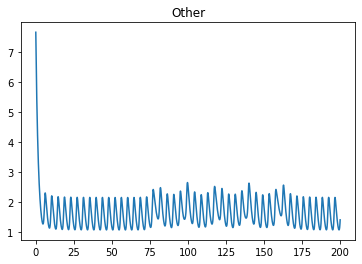

In [6]:
plt.title('Other')

plt.plot(t,V_R2)

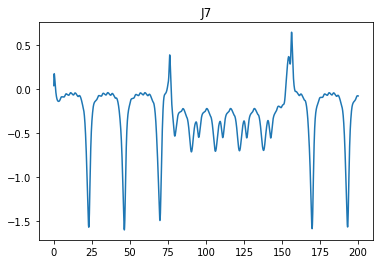

In [14]:
plt.title('J7')

plt.plot(t,V_J7)

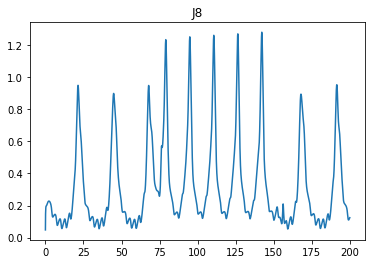

In [15]:
plt.title('J8')
plt.plot(t,V_J8)

## 2)

In [8]:
import numpy as np
from matplotlib import pyplot as plt

from Objects import sfqdc, JJ, Pulses, L, R
from FunctionCompiler import *

In [9]:
T_1 = Pulses.Pulses(loc=[1], A = 3, t0 = 50)
#T_2 = Pulses.Pulses(loc=[1], A = 5, t0 = 150)


conv_2 = sfqdc.sfqdc(loc=[1,2,3])

t = np.arange(0, 300, 0.01)

fc = FunctionCompiler([T_1, conv_2],t)
sol = fc.solve()

Generated objects are: Pulses1 sfqdc1_J1 sfqdc1_J2 sfqdc1_J3 sfqdc1_J4 sfqdc1_J5 sfqdc1_J6 sfqdc1_L1 sfqdc1_L2 sfqdc1_L3 sfqdc1_L4 sfqdc1_L5 sfqdc1_Ib1 sfqdc1_Ib2 sfqdc1_R1


In [10]:
L1 = fc.object_dict['sfqdc1_L1']
L2 = fc.object_dict['sfqdc1_L2']
JJ2 = fc.object_dict['sfqdc1_J2']
JJ1 = fc.object_dict['sfqdc1_J1']

V_L1 = L1.get_data("V",t,sol);
V_L2 = L2.get_data("V",t,sol);
V_JJ1 = JJ1.get_data("V",t,sol);
V_JJ2 = JJ2.get_data("V",t,sol);

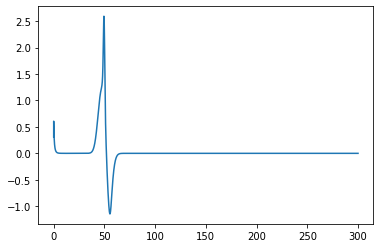

In [11]:
plt.plot(t,V_L1 + V_L2 + V_JJ1 + V_JJ2)

In [12]:
JJ_5 = fc.object_dict['sfqdc1_J5']
V_JJ_5 = JJ_5.get_data("V",t,sol);

JJ_3 = fc.object_dict['sfqdc1_J3']
V_JJ_3 = JJ_3.get_data("V",t,sol);

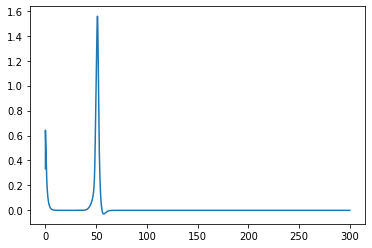

In [13]:
plt.plot(t,V_JJ_5)

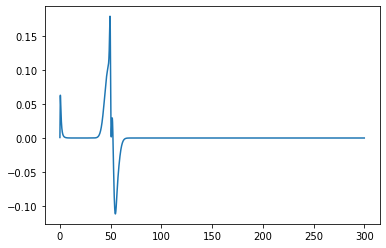

In [14]:
plt.plot(t,V_JJ_3)